In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df = pd.read_csv('./Data/tcd-ml-1920-group-income-train.csv')

/Users/zhangruiqi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Explore Data

In [3]:
df.head()

,Instance,Year of Record,Housing Situation,Crime Level in the City of Employement,Work Experience in Current Job [years],Satisfation with employer,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Yearly Income in addition to Salary (e.g. Rental Income),Total Yearly Income [EUR]
0,1,1940.0,0,33,17,Unhappy,other,45,Afghanistan,25179,group head,No,1,Black,182,0 EUR,6182.05
1,2,1940.0,0,25,4.9,Unhappy,female,17,Afghanistan,2278204,heavy vehicle and mobile equipment service tec...,No,0,Blond,172,0 EUR,6819.69
2,3,1940.0,0,34,21,Unhappy,female,48,Afghanistan,822134,sorter,Bachelor,0,Blond,144,0 EUR,8663.53
3,4,1940.0,0,70,18,Average,female,42,Albania,59477,quality control senior engineer,No,1,Brown,152,0 EUR,2400.64
4,5,1940.0,0,51,8,Happy,other,15,Albania,23494,logistician,Master,1,Black,180,0 EUR,2816.18


In [21]:
df_selected = df.iloc[:, [0, 6, 7, 8, 9, 10,-1]].copy()

Instance Frequency check 



/Users/zhangruiqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


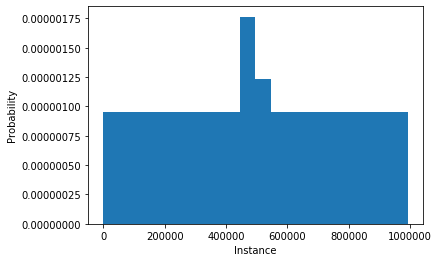

None



Age Frequency check 



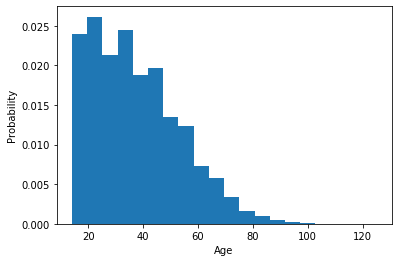

None



Size of City Frequency check 



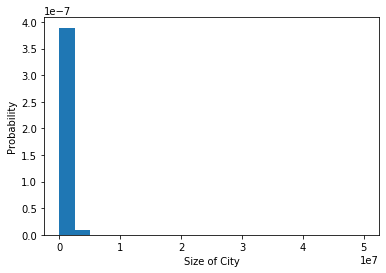

None



Total Yearly Income [EUR] Frequency check 



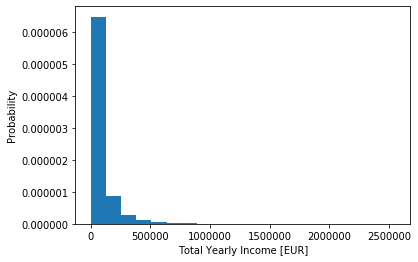

None





,Data Type,Number of Nulls,Number of Zeroes,Number of Blanks,Number of Unknowns,Percentage of Unique Values,count,mean,std,min,25%,50%,75%,max
columns,,,,,,,,,,,,,,
Instance,int64,0,0,0,0,94.58%,1048574.0,495114.114822,2.784549e+05,1.00,262144.25,489008.500,7.295658e+05,991709.00
Gender,object,74127,6804,0,62957,0.0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,int64,0,0,0,0,0.01%,1048574.0,37.337477,1.599811e+01,14.00,24.00,35.000,4.800000e+01,125.00
Country,object,0,2,0,0,0.02%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size of City,int64,0,0,0,0,58.67%,1048574.0,833354.543033,2.135273e+06,15.00,72837.00,504480.000,1.183644e+06,49993331.00
Profession,object,2853,0,0,0,0.13%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Yearly Income [EUR],float64,0,0,0,0,79.9%,1048574.0,68509.733397,1.119298e+05,6.37,5333.73,21890.815,8.603051e+04,2548790.96


In [22]:
def freq_chart_cat(df,a):
    df2 = df.groupby(a).agg({'Instance':'count'}).sort_values(by=a)
    ax = df2['Instance'].plot(kind='bar', title =a+" Freq", figsize = [df2.shape[0]*0.5,5], legend=True, fontsize=18)
    ax.set_xlabel(a, fontsize=20)
    ax.set_ylabel("Freq", fontsize=20)
    print(a+' Frequency check \n')
    print(df2)
    print(plt.show())
    print('\n\n')

def num_hist(df,a):
    plt.hist(df[a], normed=True, bins=20)
    plt.ylabel('Probability')
    plt.xlabel(a)
    print(a+' Frequency check \n')
    print(plt.show())
    print('\n\n')
    
def data_explore(df):
    unique_size = []
    zeros = []
    cols = []
    blanks = []
    unknowns = []
    
    for i in df:
        cols.append(i)
        unique_size.append(str(round(df[i].nunique()*100/df.shape[0],2))+'%')

        l = list(df[i])
        n = 0
        m = 0
        u = 0
        for j in l:
            if str(j).strip() == '0':
                n += 1
            if str(j).strip == '':
                m += 1
            if str(j).lower() == 'unknown':
                u += 1
        zeros.append(n)
        blanks.append(m)
        unknowns.append(u)
        
    df_info2 = pd.DataFrame({'Data Type':df.dtypes.tolist(), 'Number of Nulls':df.isna().sum().tolist(), 'Number of Zeroes':zeros, 'Number of Blanks':blanks, 'Number of Unknowns':unknowns, 'Percentage of Unique Values':unique_size})
    df_info2.index = cols
    df_describe = pd.DataFrame(df.describe()).transpose()
    df_info3 = df_info2.merge(df_describe,left_on = df_info2.index, right_on = df_describe.index, how = 'left')
    df_info3 = df_info3.rename(columns = {'key_0':'columns'})
    df_info3 = df_info3.set_index('columns')
    
    for i in df.columns:
#         if df[i].nunique() < 20:
#             freq_chart_cat(df,i)
        if df[i].dtype.kind in 'bifc':
            num_hist(df,i)
    return df_info3

data_explore(df_selected)

In [23]:
df_selected.head()

,Instance,Gender,Age,Country,Size of City,Profession,Total Yearly Income [EUR]
0,1,other,45,Afghanistan,25179,group head,6182.05
1,2,female,17,Afghanistan,2278204,heavy vehicle and mobile equipment service tec...,6819.69
2,3,female,48,Afghanistan,822134,sorter,8663.53
3,4,female,42,Albania,59477,quality control senior engineer,2400.64
4,5,other,15,Albania,23494,logistician,2816.18


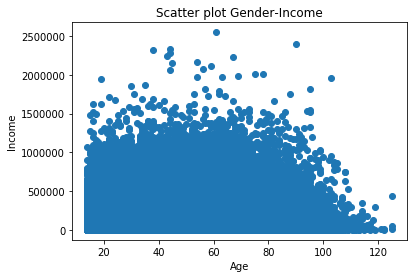

In [14]:
x = df_selected['Age']
y = df_selected['Total Yearly Income [EUR]']
plt.scatter(x, y)
plt.title('Scatter plot Age-Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [26]:
#df_selected['Gender'].value_counts()
df_selected['Gender'] = df_selected['Gender'].replace(to_replace="0", value="unknown").fillna("unknown")

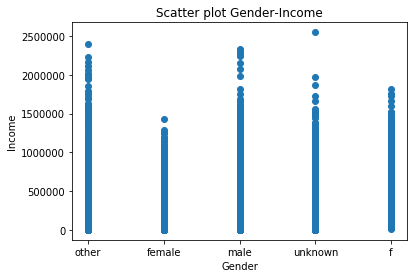

In [28]:
x = df_selected['Gender']
y = df_selected['Total Yearly Income [EUR]']
plt.scatter(x, y)
plt.title('Scatter plot Gender-Income')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

# f might mean female

In [34]:
df_selected['Country'] = df_selected['Country'].fillna("unknown")

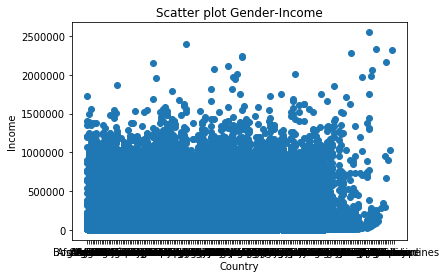

In [36]:
x = df_selected['Country']
y = df_selected['Total Yearly Income [EUR]']
plt.scatter(x, y)
plt.title('Scatter plot Country-Income')
plt.xlabel('Country')
plt.ylabel('Income')
plt.show()

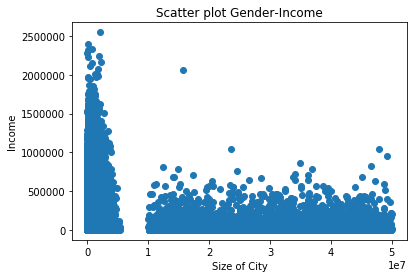

In [37]:
x = df_selected['Size of City']
y = df_selected['Total Yearly Income [EUR]']
plt.scatter(x, y)
plt.title('Scatter plot SizeOfCity-Income')
plt.xlabel('Size of City')
plt.ylabel('Income')
plt.show()

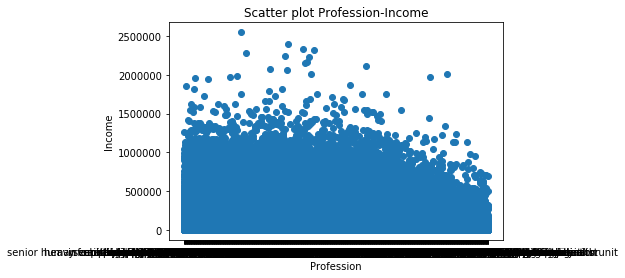

In [38]:
df_selected['Profession'] = df_selected['Profession'].fillna("unknown")
x = df_selected['Profession']
y = df_selected['Total Yearly Income [EUR]']
plt.scatter(x, y)
plt.title('Scatter plot Profession-Income')
plt.xlabel('Profession')
plt.ylabel('Income')
plt.show()

In [41]:
df_selected['Age'].mean()

37.33747737403369

In [45]:
df_selected.isnull().sum()
# df_selected['Age'] = df_selected['Age'].fillna(df_selected['Age'].mean())
# df_selected['Size of City'] = df_selected['Size of City'].fillna(df_selected['Size of City'].mean())
# df_selected['Total Yearly Income [EUR]'] = df_selected['Total Yearly Income [EUR]'].fillna(df_selected['Total Yearly Income [EUR]'].mean())

Instance                     1
Gender                       0
Age                          0
Country                      0
Size of City                 0
Profession                   0
Total Yearly Income [EUR]    0
dtype: int64

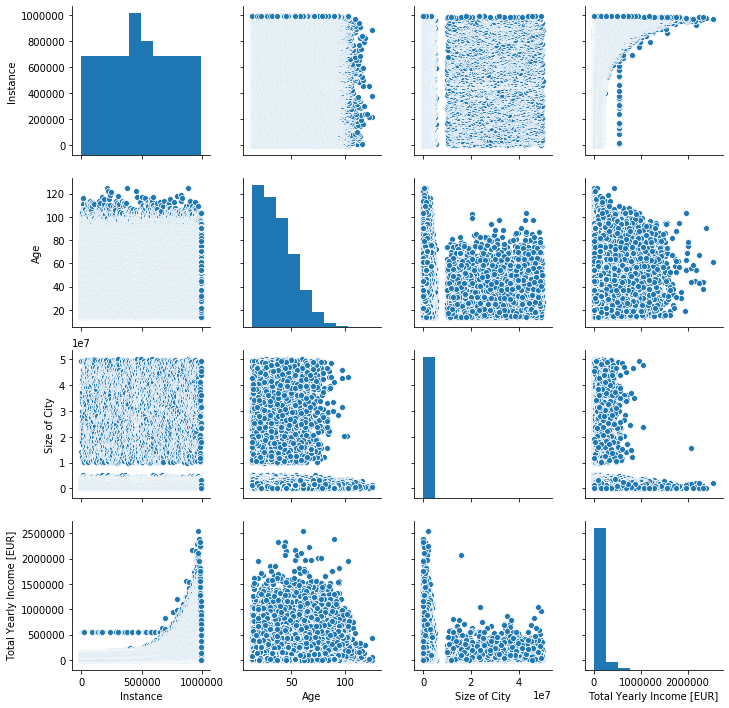

In [46]:
import seaborn as sns
sns.pairplot(df_selected[:-1])

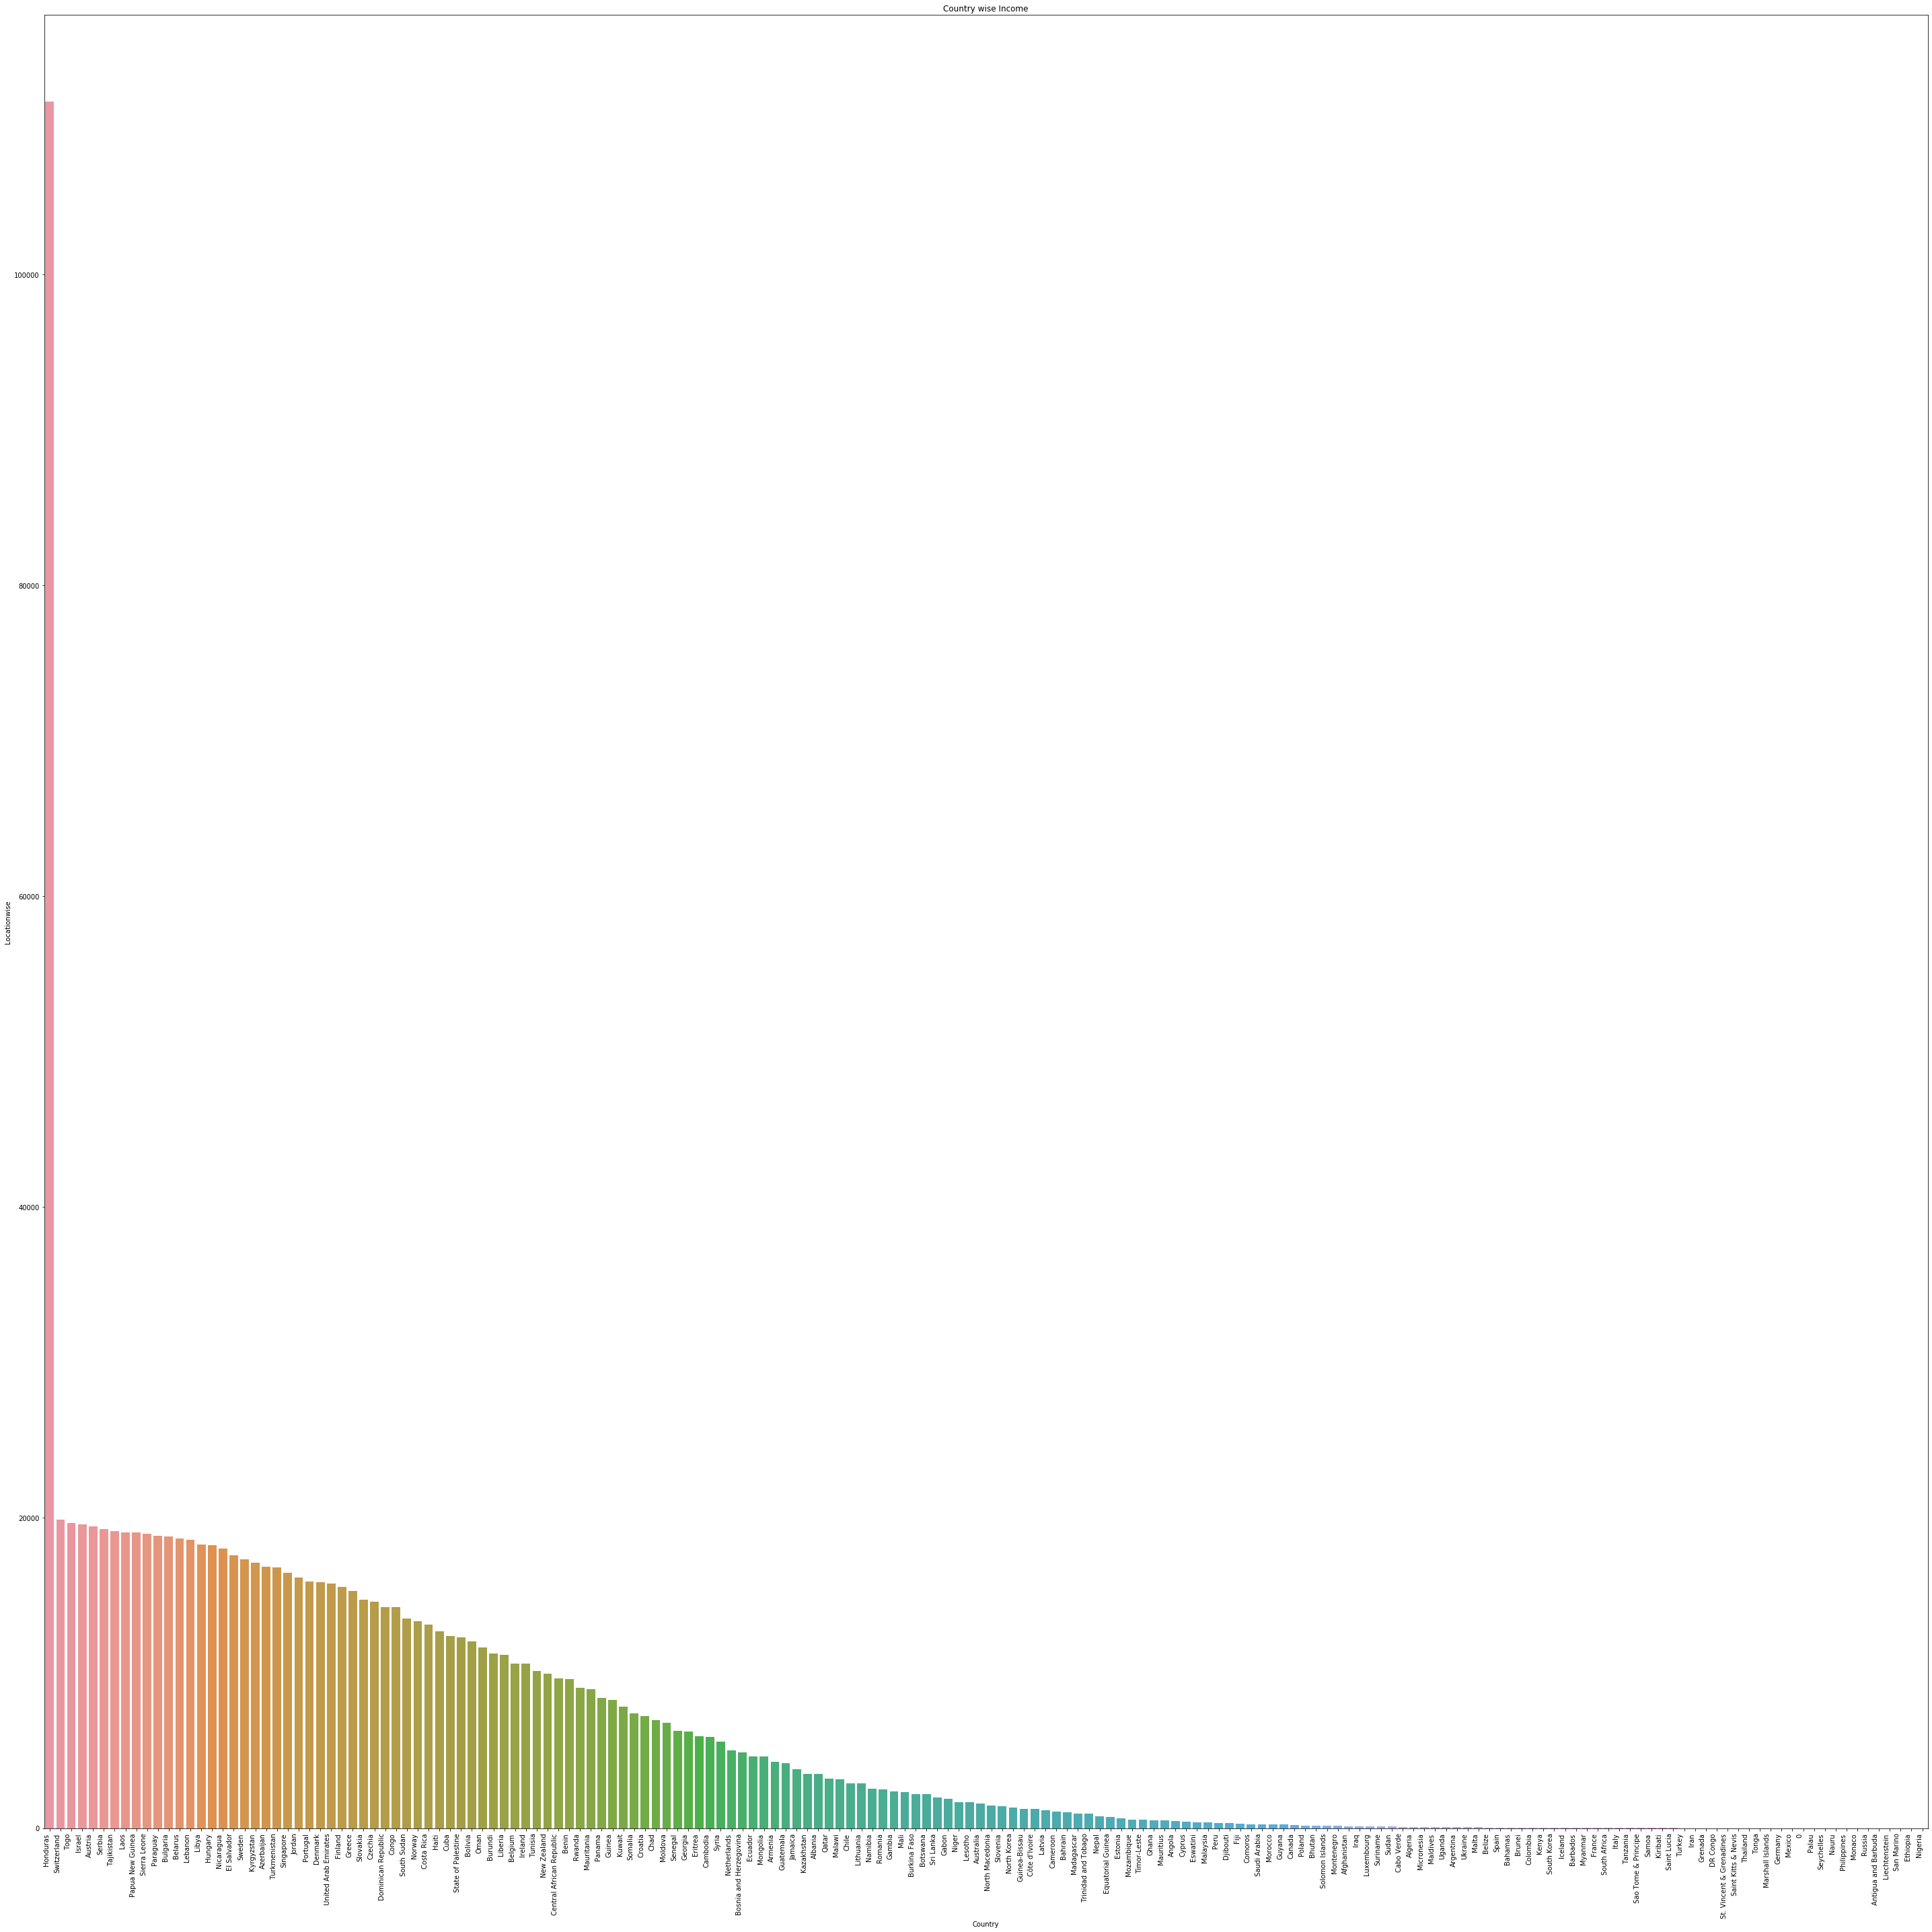

In [35]:
import seaborn as sns
country_wise_income = df_selected.groupby(['Country']).size().reset_index(name='Locationwise').sort_values('Locationwise',ascending=False)
plt.figure(figsize=(40,40))
ax = sns.barplot(x='Country', y="Locationwise", data=country_wise_income)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Country wise Income')
plt.tight_layout()
plt.show()
